In [1]:
#! pip install zarr
#! pip install s3fs
#! pip install climetlab
#! pip install climetlab_s2s_ai_competition --quiet
# !pip install matplotlib -quiet

In [2]:
import climetlab as cml 

module 'Magics' has no attribute 'strict_mode'


In [3]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.2.3
Climetlab-s2s-ai-competition plugin version : 0.2.3


In [4]:
#version = '0.1.6' # version of the data
version = '0.1.20' # version of the data

In [5]:
param = 't2m'

In [6]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=["20200102", "20200109", "20200116"],
                         version=version,
                         parameter = param,
                         #hindcast=True,
                         format='netcdf')
ds = cmlds.to_xarray()
#ds

By downloading data from this dataset, you agree to the their terms: Attribution 4.0 International(CC BY 4.0). If you do not agree with such terms, do not download the data. For more information, please visit https://www.ecmwf.int/en/terms-use and https://apps.ecmwf.int/datasets/data/s2s/licence/.


In [7]:
ts = ds.sel(realization=0).sel(latitude=37, longitude=0, method='nearest').drop(['realization','latitude','longitude']) ; ts

<xarray.Dataset>
Dimensions:        (forecast_time: 3, step: 46)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-01-16
  * step           (step) timedelta64[ns] 1 days 2 days ... 45 days 46 days
Data variables:
    time           (forecast_time, step) datetime64[ns] 2020-01-03 ... 2020-0...
    t2m            (forecast_time, step) float32 287.5 287.2 ... 286.5 286.6

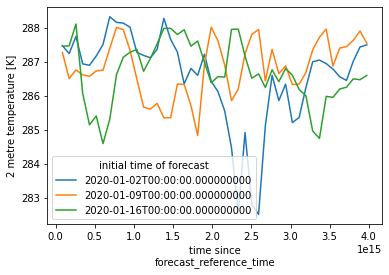

In [8]:
%matplotlib inline
ts[param].plot(hue='forecast_time');

In [9]:
ts.mean('forecast_time')[param]

<xarray.DataArray 't2m' (step: 46)>
array([287.39444, 287.06552, 287.53296, 286.53452, 286.2002 , 286.43024,
       286.2793 , 287.00403, 287.59183, 287.73154, 287.5365 , 287.04074,
       286.51926, 286.59958, 286.88345, 287.1976 , 286.99332, 287.13623,
       286.86926, 286.6525 , 286.34235, 287.03625, 286.93555, 286.7603 ,
       286.3278 , 286.08694, 285.56934, 286.43558, 285.7039 , 285.6976 ,
       285.92642, 286.90323, 286.30203, 286.66953, 286.04376, 285.95688,
       286.30298, 286.4325 , 286.49976, 286.95715, 286.5316 , 286.71475,
       286.71017, 287.04196, 287.26425, 287.20737], dtype=float32)
Coordinates:
  * step     (step) timedelta64[ns] 1 days 2 days 3 days ... 45 days 46 days

In [10]:
ts[[param,'time']].groupby('time').mean()[param]

<xarray.DataArray 't2m' (time: 60)>
array([287.46783, 287.23428, 287.73975, 286.93195, 286.89035, 287.1639 ,
       287.5014 , 287.79114, 287.325  , 287.44333, 287.3083 , 286.91907,
       286.95325, 286.9291 , 287.39975, 287.9127 , 287.89685, 286.8892 ,
       285.99258, 285.95383, 285.59482, 286.09708, 286.12894, 286.1985 ,
       286.38477, 286.0513 , 284.9941 , 285.61008, 285.7471 , 286.16504,
       286.8978 , 287.0949 , 286.5461 , 286.6616 , 286.68076, 286.71094,
       286.8516 , 286.6603 , 286.98218, 287.17664, 287.20227, 286.6805 ,
       286.42947, 286.77582, 287.0038 , 287.3208 , 287.18155, 286.83188,
       286.99722, 286.80908, 286.81024, 286.4295 , 286.14   , 285.9778 ,
       285.94766, 286.19363, 286.246  , 286.49194, 286.46655, 286.59192],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 2020-01-04 ... 2020-03-02

## More exploration

In [11]:
a = ts[[param,'time']].groupby('time').count().rename({param:'count'})
b = ts[[param, 'time']].groupby('time').mean()
import xarray as xr
xr.merge([a,b])

<xarray.Dataset>
Dimensions:  (time: 60)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-03 2020-01-04 ... 2020-03-02
Data variables:
    count    (time) int64 1 1 1 1 1 1 1 2 2 2 2 2 2 ... 2 2 2 2 2 1 1 1 1 1 1 1
    t2m      (time) float32 287.5 287.2 287.7 286.9 ... 286.2 286.5 286.5 286.6

In [12]:
da = ts[['t2m','time']]
#da.groupby("time.dayofyear") - 
#da.groupby("time.dayofyear").mean(["time","stacked_forecast_time_step"])
da.groupby("time.dayofyear").count() #"time.dayofyear")

<xarray.Dataset>
Dimensions:    (dayofyear: 60)
Coordinates:
  * dayofyear  (dayofyear) int64 3 4 5 6 7 8 9 10 11 ... 55 56 57 58 59 60 61 62
Data variables:
    t2m        (dayofyear) int64 1 1 1 1 1 1 1 2 2 2 2 ... 2 2 2 2 1 1 1 1 1 1 1
    time       (dayofyear) int64 1 1 1 1 1 1 1 2 2 2 2 ... 2 2 2 2 1 1 1 1 1 1 1

See : http://xarray.pydata.org/en/stable/groupby.html